## 07-1 빠진 데이터를 찾아라! - 결측치 정제하기

### 결측치 찾기

#### 결측치 만들기

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기

In [3]:
pd.isna(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
dtype: int64

### 결측치 제거하기
#### 결측치 있는 행 제거하기

In [5]:
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                     # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

#### 여러 변수에 결측치 없는 데이터 추출하기

In [7]:
df_nomiss = df.dropna(subset = ['score', 'sex'])  # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### 결측치가 하나라도 있으면 제거하기

In [8]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [9]:
df['score'].mean()

4.0

In [10]:
df['score'].sum()

16.0

In [11]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


------------------------------------------------------------------------
### 결측치 대체하기
#### 평균값으로 결측치 대체하기

In [12]:
exam = pd.read_csv('exam.csv')           # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [13]:
exam['math'].mean()

55.23529411764706

In [14]:
exam['math'] = exam['math'].fillna(55)  # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [15]:
exam['math'].isna().sum()  # 결측치 빈도 확인

0

---
## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기
### 이상치 제거하기 - 존재할 수 없는 값

In [16]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


#### 이상치 확인하기

In [17]:
df['sex'].value_counts(sort = False)

1    3
2    2
3    1
Name: sex, dtype: int64

In [18]:
df['score'].value_counts(sort = False)

5    1
4    2
3    1
2    1
6    1
Name: score, dtype: int64

#### 결측 처리하기

In [19]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [20]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [21]:
df.dropna(subset = ['sex', 'score']) \
       .groupby('sex') \
       .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) `np.where()`는 문자와 `NaN`을 함께 반환할 수 없습니다.

In [23]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞을 때 문자 부여

In [24]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [25]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [26]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [27]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)  

In [28]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [29]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


------------------------------------------------------------------------
### 이상치 제거하기 - 극단적인 값

#### 상자 그림으로 극단치 기준 정하기

##### 1. 상자 그림 살펴보기

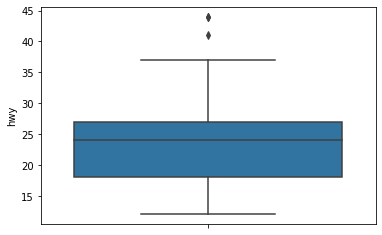

In [30]:
mpg = pd.read_csv('mpg.csv')
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

##### 2.극단치 기준값 구하기

**(1) 1사분위수, 3사분위수 구하기**

In [31]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [32]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

**(2) IQR 구하기**

In [33]:
iqr = pct75 - pct25
iqr

9.0

**(3) 하한, 상한 구하기**

In [34]:
pct25 - 1.5 * iqr  # 하한

4.5

In [35]:
pct75 + 1.5 * iqr  # 상한

40.5

#### 3. 극단치를 결측 처리하기

In [36]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

#### 4. 결측치 제거하고 분석하기

In [37]:
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
